In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive



# 1. Chuẩn bị dữ liệu

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Big_Data/Code/Data/application_data.csv')




# 2.  Tiền xử lý dữ liệu




In [4]:
data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(307511, 122)

**2.1 Thực hiện xóa các cột dữ liệu chứa số lượng giá trị null lớn hơn 40% tổng số bản ghi**







In [6]:
missing_value = pd.DataFrame({
    'Column': data.columns,
    'MissingPercentage': (data.isnull().sum() * 100) / data.shape[0]
}).reset_index(drop=True)
print(missing_value)

                         Column  MissingPercentage
0                    SK_ID_CURR           0.000000
1                        TARGET           0.000000
2            NAME_CONTRACT_TYPE           0.000000
3                   CODE_GENDER           0.000000
4                  FLAG_OWN_CAR           0.000000
..                          ...                ...
117   AMT_REQ_CREDIT_BUREAU_DAY          13.501631
118  AMT_REQ_CREDIT_BUREAU_WEEK          13.501631
119   AMT_REQ_CREDIT_BUREAU_MON          13.501631
120   AMT_REQ_CREDIT_BUREAU_QRT          13.501631
121  AMT_REQ_CREDIT_BUREAU_YEAR          13.501631

[122 rows x 2 columns]


In [7]:
missing_value = pd.DataFrame({'value': data.isnull().sum() * 100 / len(data.index)})
columns_to_drop = [col for col in missing_value[missing_value['value'] > 40].index.tolist()]
print(columns_to_drop)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [8]:
data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)

In [9]:
missing_value = pd.DataFrame({'value': data.isnull().sum() * 100 / len(data.index)})
print("Các thuộc tính có giá trị null < 40%:\n", missing_value[missing_value['value'] < 40])

Các thuộc tính có giá trị null < 40%:
                                 value
SK_ID_CURR                   0.000000
TARGET                       0.000000
NAME_CONTRACT_TYPE           0.000000
CODE_GENDER                  0.000000
FLAG_OWN_CAR                 0.000000
...                               ...
AMT_REQ_CREDIT_BUREAU_DAY   13.501631
AMT_REQ_CREDIT_BUREAU_WEEK  13.501631
AMT_REQ_CREDIT_BUREAU_MON   13.501631
AMT_REQ_CREDIT_BUREAU_QRT   13.501631
AMT_REQ_CREDIT_BUREAU_YEAR  13.501631

[73 rows x 1 columns]


In [10]:
missing_value = pd.DataFrame({'value': data.isnull().sum() * 100 / len(data.index)})
print("Các thuộc tính có giá trị 0% < null < 40%:\n",
      missing_value[(missing_value['value'] > 0) & (missing_value['value'] < 40)])

Các thuộc tính có giá trị 0% < null < 40%:
                                 value
AMT_ANNUITY                  0.003902
AMT_GOODS_PRICE              0.090403
NAME_TYPE_SUITE              0.420148
OCCUPATION_TYPE             31.345545
CNT_FAM_MEMBERS              0.000650
EXT_SOURCE_2                 0.214626
EXT_SOURCE_3                19.825307
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
DAYS_LAST_PHONE_CHANGE       0.000325
AMT_REQ_CREDIT_BUREAU_HOUR  13.501631
AMT_REQ_CREDIT_BUREAU_DAY   13.501631
AMT_REQ_CREDIT_BUREAU_WEEK  13.501631
AMT_REQ_CREDIT_BUREAU_MON   13.501631
AMT_REQ_CREDIT_BUREAU_QRT   13.501631
AMT_REQ_CREDIT_BUREAU_YEAR  13.501631


**2.2 Xử lý các giá trị thiếu (NaN) và các giá trị âm**

In [11]:
# Tạo danh sách các cột có tỷ lệ null < 40% và chỉ chọn các cột số
numeric_columns = data.select_dtypes(include=['number']).columns
columns_to_fill = [col for col in missing_value[missing_value['value'] < 40].index if col in numeric_columns]

In [12]:
def fill_missing_with_mean(data, columns):
    for column in columns:
        if column in data.columns:  # Kiểm tra xem cột có tồn tại trong DataFrame
            mean_value = data[column].mean()  # Tính giá trị trung bình của cột
            data[column] = data[column].fillna(mean_value)  # Thay thế NaN bằng giá trị trung bình
    return data

In [13]:
data = fill_missing_with_mean(data, columns_to_fill)

In [14]:
def checkNull(x):
  null_columns = x.columns[x.isnull().any()].tolist()
  if null_columns:
    print('Columns with null value: ', null_columns)
  else:
      print('No columns have null value!')

In [15]:
checkNull(data)

Columns with null value:  ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']


In [16]:
data['NAME_TYPE_SUITE'].describe()

,NAME_TYPE_SUITE
count,306219
unique,7
top,Unaccompanied
freq,248526


In [17]:
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [18]:
data['OCCUPATION_TYPE'].mode()[0]

'Laborers'

In [19]:
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna('Laborers')

In [20]:
checkNull(data)

No columns have null value!


In [21]:
def find_negative_columns(df):
    # Tạo danh sách để lưu các cột có giá trị âm
    negative_columns = []

    # Lặp qua từng cột trong DataFrame
    for col in df.columns:
        # Chỉ kiểm tra các cột số (bỏ qua cột chuỗi)
        if pd.api.types.is_numeric_dtype(df[col]):
            # Kiểm tra nếu cột có giá trị âm (bỏ qua các giá trị null)
            if (df[col] < 0).any(skipna=True):  # skipna=True bỏ qua các giá trị NaN
                negative_columns.append(col)

    if negative_columns:
        print("Columns with negative values:", negative_columns)
    else:
        print("No columns have negative values.")

In [22]:
find_negative_columns(data)

Columns with negative values: ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


In [23]:
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH'])
data['DAYS_EMPLOYED'] = abs(data['DAYS_EMPLOYED'])
data['DAYS_REGISTRATION'] = abs(data['DAYS_REGISTRATION'])
data['DAYS_ID_PUBLISH'] = abs(data['DAYS_ID_PUBLISH'])
data['DAYS_LAST_PHONE_CHANGE'] = abs(data['DAYS_LAST_PHONE_CHANGE'])

**2.3 Chuẩn hóa dữ liệu số**

In [24]:
y = data['TARGET'].iloc[:10000]
x = data.drop(['TARGET'], axis=1).iloc[:10000]

In [25]:
from sklearn.preprocessing import StandardScaler

# Trích xuất các thuộc tính số và chuẩn hóa
selected_ser = x.select_dtypes(include=['int64', 'float64'])
print('Danh sách các cột thuộc tính có  dữ liệu số:  \n',  selected_ser.columns)

# Chuẩn hóa dữ liệu
scaler_ser = StandardScaler().fit_transform(selected_ser)
dt_numdata = pd.DataFrame(scaler_ser, columns=selected_ser.columns)

Danh sách các cột thuộc tính có  dữ liệu số:  
 Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', '

**2.4 Xử lý dữ liệu chữ (One-hot Code)**

In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False, drop='first') # thêm sparse = False

# Trích xuất thuộc tính mục từ bộ dữ liệu
selected_ser = x.select_dtypes(include=['object']).copy()
print("Danh sách thuộc tính có dữ liệu mục: \n", selected_ser.columns)

# One-hot mã hóa và chuyển về DataFrame
dt_catdata = pd.DataFrame(encoder.fit_transform(selected_ser), columns=encoder.get_feature_names_out(selected_ser.columns))

# Đảm bảo chỉ số khớp nhau trước khi nối
dt_catdata.index = dt_numdata.index

Danh sách thuộc tính có dữ liệu mục: 
 Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')


In [27]:
x = pd.concat([dt_numdata, dt_catdata], axis=1)
x.shape

(10000, 167)

**2.5 Imbalanced data**

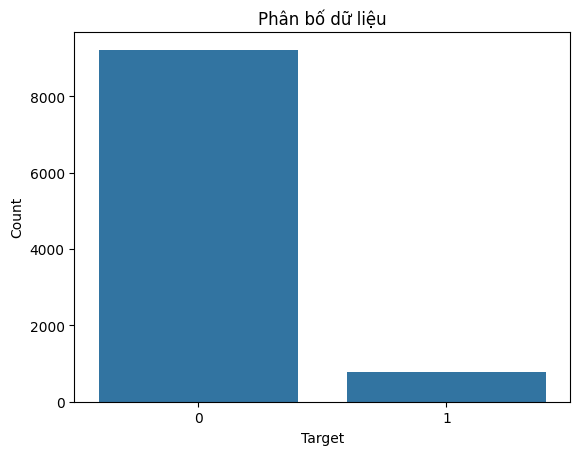

In [28]:
sns.countplot(x=y, data=data)
plt.title('Phân bố dữ liệu')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
x, y = smote.fit_resample(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


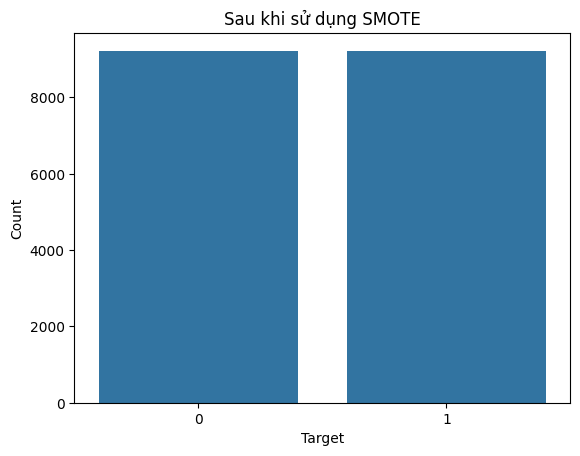

In [30]:
sns.countplot(x=y, data=data)
plt.title('Sau khi sử dụng SMOTE')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**2.6 Lựa chọn thuộc tính quan trọng**

In [31]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Khởi tạo và huấn luyện mô hình (giả sử x và y đã được định nghĩa)
rfc = RandomForestClassifier()
rfc.fit(x, y)

# Trích xuất thuộc tính quan trọng
score = np.round(rfc.feature_importances_, 3)
importances = pd.DataFrame({'feature': x.columns, 'importance': score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

In [32]:
top = 30/100 * len(x.columns)
top = int(top)
print(top)

50


                                                   importance
feature                                                      
EXT_SOURCE_3                                            0.048
EXT_SOURCE_2                                            0.041
CODE_GENDER_M                                           0.038
NAME_EDUCATION_TYPE_Secondary / secondary special       0.038
NAME_EDUCATION_TYPE_Higher education                    0.034
NAME_INCOME_TYPE_Working                                0.033
FLAG_OWN_CAR_Y                                          0.029
AMT_REQ_CREDIT_BUREAU_WEEK                              0.027
AMT_REQ_CREDIT_BUREAU_YEAR                              0.027
AMT_REQ_CREDIT_BUREAU_MON                               0.025
AMT_REQ_CREDIT_BUREAU_DAY                               0.022
NAME_TYPE_SUITE_Unaccompanied                           0.021
ORGANIZATION_TYPE_Business Entity Type 3                0.021
FLAG_OWN_REALTY_Y                                       0.020
DAYS_BIR

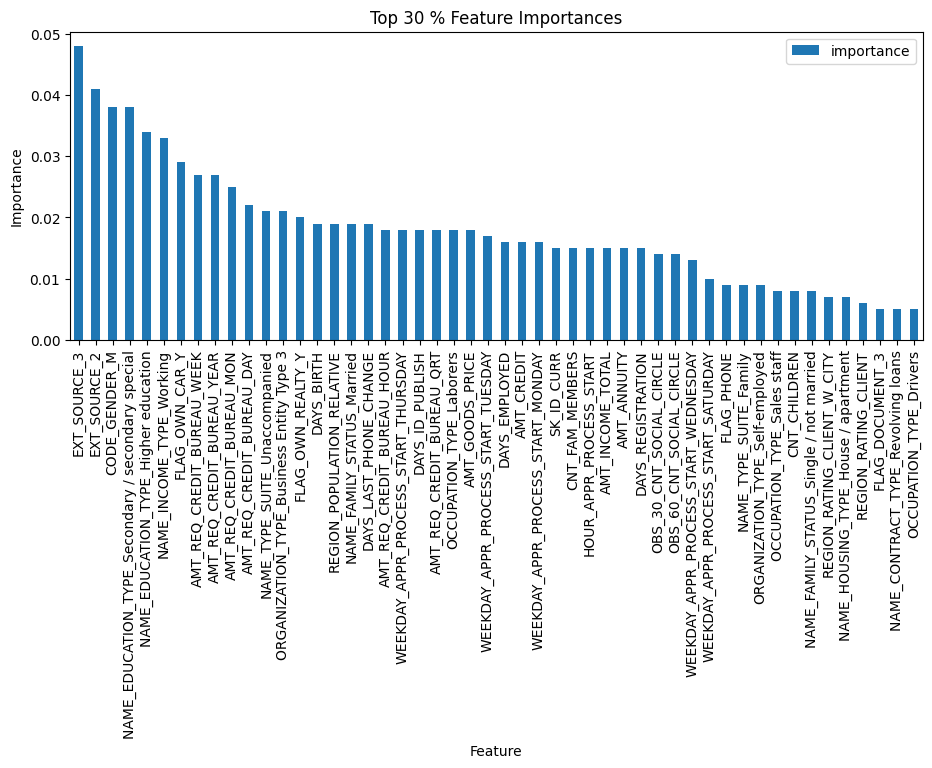

In [33]:
# Lọc ra đặc trưng quan trọng nhất
top_importances = importances.head(top)
# Hiển thị đặc trưng quan trọng nhất dưới dạng bảng
print(top_importances)

# Vẽ biểu đồ cột cho đặc trưng quan trọng nhất
plt.rcParams['figure.figsize'] = (11, 4)
top_importances.plot.bar()
plt.title('Top 30 % Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.show()

In [34]:
# Xóa các thuộc tính không quan trọng
features = top_importances.index.to_list()
x = x[features]

# 3. Chia bộ dữ liệu

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size = 0.70, random_state = 90)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size = 0.70, random_state = 90)

# 4. Huấn luyện mô hình

In [36]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs = -1, random_state = 42)
LGR_Classifier.fit(X_train, Y_train);

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train);

# Train SVC
Support_Vector_Classifier = SVC(kernel='rbf', probability=True)
Support_Vector_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# 5. Đánh giá mô hình (Dựa trên  tập validation)

In [37]:
from sklearn import metrics

models = []
models.append(('Support_Vector_Classifier', Support_Vector_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_val, Y_val, cv=10)

    # Dự báo xác suất cho các mẫu trong tập kiểm tra
    probabilities = v.predict_proba(X_test)[:, 1]

    # Áp dụng ngưỡng 0.5 để phân loại
    predictions = (probabilities >= 0.5).astype(int)

    accuracy = metrics.accuracy_score(Y_val, v.predict(X_val))
    confusion_matrix = metrics.confusion_matrix(Y_val, v.predict(X_val))
    classification = metrics.classification_report(Y_val, v.predict(X_val))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    # In kết quả xác suất và phân loại
    print("Xác suất rủi ro cao (P(y=1 | X)): \n", probabilities[:10])
    print()
    print("\nDự báo phân loại (0: Không rủi ro, 1: Rủi ro cao): \n", predictions[:10])
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


============================== Support_Vector_Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8348557500199792

Xác suất rủi ro cao (P(y=1 | X)): 
 [0.76739633 0.30288736 0.33794314 0.13310512 0.34349512 0.08259001
 0.1684174  0.01880584 0.63590871 0.91021366]


Dự báo phân loại (0: Không rủi ro, 1: Rủi ro cao): 
 [1 0 0 0 0 0 0 0 1 1]

Model Accuracy:
 0.8892903225806451

Confusion matrix:
 [[1601  314]
 [ 115 1845]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      1915
           1       0.85      0.94      0.90      1960

    accuracy                           0.89      3875
   macro avg       0.89      0.89      0.89      3875
weighted avg       0.89      0.89      0.89      3875



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.867102879671808

Xác suất rủi ro cao (P(y=

# 6. Xác nhận mô hình (Model Validation)

In [38]:
for i, v in models:
    # Dự báo xác suất cho các mẫu trong tập kiểm tra
    probabilities = v.predict_proba(X_test)[:, 1]
    # Áp dụng ngưỡng 0.5 để phân loại
    predictions = (probabilities >= 0.5).astype(int)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
        # In kết quả xác suất và phân loại
    print("Xác suất rủi ro cao (P(y=1 | X)): \n", probabilities[:10])
    print()
    print("\nDự báo phân loại (0: Không rủi ro, 1: Rủi ro cao): \n", predictions[:10])
    print()
    print("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


============================== Support_Vector_Classifier Model Test Results ==============================

Xác suất rủi ro cao (P(y=1 | X)): 
 [0.76739633 0.30288736 0.33794314 0.13310512 0.34349512 0.08259001
 0.1684174  0.01880584 0.63590871 0.91021366]


Dự báo phân loại (0: Không rủi ro, 1: Rủi ro cao): 
 [1 0 0 0 0 0 0 0 1 1]

Model Accuracy:
 0.8789521228545619

Confusion matrix:
 [[2344  480]
 [ 190 2521]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.87      2824
           1       0.84      0.93      0.88      2711

    accuracy                           0.88      5535
   macro avg       0.88      0.88      0.88      5535
weighted avg       0.88      0.88      0.88      5535



============================== Decision Tree Classifier Model Test Results ==============================

Xác suất rủi ro cao (P(y=1 | X)): 
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 1.]


Dự báo phân loại (0: Không rủi ro, 1: Rủi ro cao):